In [1]:
# Install all dependencies
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install tabulate
!{sys.executable} -m pip install matplotlib2tikz

In [19]:
# config
HYBRID_INTERRUPT = ['/Users/tzwickl/Documents/TumStudy/MasterStudy/MasterThesis/TUM/InterruptsInUserSpaceDrivers/Experiments/Experiment3/ixyc/hybridInterrupt']
INTERRUPT_DISABLED = ['/Users/tzwickl/Documents/TumStudy/MasterStudy/MasterThesis/TUM/InterruptsInUserSpaceDrivers/Experiments/Experiment3/ixyc/interruptDisabled']
INTERRUPT = ['/Users/tzwickl/Documents/TumStudy/MasterStudy/MasterThesis/TUM/InterruptsInUserSpaceDrivers/Experiments/Experiment3/ixyc/interrupt']
RUNTIME = 34
CPU_FREQUENCY = 2.4 * (10**9)

In [16]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import codecs
import numpy as np
import pandas as pd
from tqdm import tqdm
from tabulate import tabulate
import matplotlib2tikz
import matplotlib.ticker as tick
import csv
import re

In [20]:
interrupt = {}

for path in INTERRUPT:
    if not os.path.isdir(path):
        continue
    files = os.listdir(path)

    flatency = interrupt["latency"] = []
    flatency_ = filter(lambda x: x.startswith('histo'), files)
    flatency.extend(map(lambda x: os.path.join(path, x), flatency_))

    fresult = interrupt["result"] = []
    fresult_ = filter(lambda x: x.startswith('result'), files)
    fresult.extend(map(lambda x: os.path.join(path, x), fresult_))

    fpowertop = interrupt["power"] = []
    fpowertop_ = filter(lambda x: x.startswith('power'), files)
    fpowertop.extend(map(lambda x: os.path.join(path, x), fpowertop_))
    
interruptDisabled = {}

for path in INTERRUPT_DISABLED:
    if not os.path.isdir(path):
        continue
    files = os.listdir(path)

    flatency = interruptDisabled["latency"] = []
    flatency_ = filter(lambda x: x.startswith('histo'), files)
    flatency.extend(map(lambda x: os.path.join(path, x), flatency_))

    fresult = interruptDisabled["result"] = []
    fresult_ = filter(lambda x: x.startswith('result'), files)
    fresult.extend(map(lambda x: os.path.join(path, x), fresult_))

    fpowertop = interruptDisabled["power"] = []
    fpowertop_ = filter(lambda x: x.startswith('power'), files)
    fpowertop.extend(map(lambda x: os.path.join(path, x), fpowertop_))

        
hybridInterrupt = {}

for path in HYBRID_INTERRUPT:
    if not os.path.isdir(path):
        continue
    files = os.listdir(path)

    flatency = hybridInterrupt["latency"] = []
    flatency_ = filter(lambda x: x.startswith('histo'), files)
    flatency.extend(map(lambda x: os.path.join(path, x), flatency_))

    fresult = hybridInterrupt["result"] = []
    fresult_ = filter(lambda x: x.startswith('result'), files)
    fresult.extend(map(lambda x: os.path.join(path, x), fresult_))

    fpowertop = hybridInterrupt["power"] = []
    fpowertop_ = filter(lambda x: x.startswith('power'), files)
    fpowertop.extend(map(lambda x: os.path.join(path, x), fpowertop_))
    
results = {}

results["interrupt"] = {}
with open(interrupt["result"][0]) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    for row in csv_reader:
        results["interrupt"][row[0]] = {}
        results["interrupt"][row[0]]["irq"] = int(row[1])
        results["interrupt"][row[0]]["irq/s"] = int(row[1]) / RUNTIME
        results["interrupt"][row[0]]["tx"] = int(row[2])
        results["interrupt"][row[0]]["rx"] = int(row[3])
        results["interrupt"][row[0]]["lost"] = int(row[2]) - int(row[3])
        results["interrupt"][row[0]]["cpu_cycles"] = int(row[4])
        results["interrupt"][row[0]]["cpu_util"] = int(row[4]) / RUNTIME / CPU_FREQUENCY * 100

for flatency in interrupt["latency"]:
    name = os.path.splitext(os.path.basename(flatency))[0]
    latency = results["interrupt"][name.split('-')[1]]["latency"] = {}
    with open(flatency) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        latency["latency"] = []
        latency["weight"] = []
        for row in csv_reader:
            latency["latency"].append(int(row[0]))
            latency["weight"].append(int(row[1]))
            
for fpower in interrupt["power"]:
    name = os.path.splitext(os.path.basename(fpower))[0]
    power = results["interrupt"][name.split('-')[1]]["power"] = {}
    with open(fpower) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        power["c0"] = []
        power["c1"] = []
        power["c3"] = []
        power["c6"] = []
        for row in csv_reader:
            power["c0"].append(float(row[0][:1]))
            power["c1"].append(float(row[1][:1]))
            power["c3"].append(float(row[2][:1]))
            power["c6"].append(float(row[3][:1]))

results["interruptDisabled"] = {}
with open(interruptDisabled["result"][0]) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    for row in csv_reader:
        results["interruptDisabled"][row[0]] = {}
        results["interruptDisabled"][row[0]]["irq"] = int(row[1])
        results["interruptDisabled"][row[0]]["irq/s"] = int(row[1]) / RUNTIME
        results["interruptDisabled"][row[0]]["tx"] = int(row[2])
        results["interruptDisabled"][row[0]]["rx"] = int(row[3])
        results["interruptDisabled"][row[0]]["lost"] = int(row[2]) - int(row[3])
        results["interruptDisabled"][row[0]]["cpu_cycles"] = int(row[4])
        results["interruptDisabled"][row[0]]["cpu_util"] = int(row[4]) / RUNTIME / CPU_FREQUENCY * 100

for flatency in interruptDisabled["latency"]:
    name = os.path.splitext(os.path.basename(flatency))[0]
    latency = results["interruptDisabled"][name.split('-')[1]]["latency"] = {}
    with open(flatency) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        latency["latency"] = []
        latency["weight"] = []
        for row in csv_reader:
            latency["latency"].append(int(row[0]))
            latency["weight"].append(int(row[1]))
            
for fpower in interruptDisabled["power"]:
    name = os.path.splitext(os.path.basename(fpower))[0]
    power = results["interruptDisabled"][name.split('-')[1]]["power"] = {}
    with open(fpower) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        power["c0"] = []
        power["c1"] = []
        power["c3"] = []
        power["c6"] = []
        for row in csv_reader:
            power["c0"].append(float(row[0][:1]))
            power["c1"].append(float(row[1][:1]))
            power["c3"].append(float(row[2][:1]))
            power["c6"].append(float(row[3][:1]))
            
results["hybridInterrupt"] = {}
with open(hybridInterrupt["result"][0]) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    for row in csv_reader:
        results["hybridInterrupt"][row[0]] = {}
        results["hybridInterrupt"][row[0]]["irq"] = int(row[1])
        results["hybridInterrupt"][row[0]]["irq/s"] = int(row[1]) / RUNTIME
        results["hybridInterrupt"][row[0]]["tx"] = int(row[2])
        results["hybridInterrupt"][row[0]]["rx"] = int(row[3])
        results["hybridInterrupt"][row[0]]["lost"] = int(row[2]) - int(row[3])
        results["hybridInterrupt"][row[0]]["cpu_cycles"] = int(row[4])
        results["hybridInterrupt"][row[0]]["cpu_util"] = int(row[4]) / RUNTIME / CPU_FREQUENCY * 100

for flatency in hybridInterrupt["latency"]:
    name = os.path.splitext(os.path.basename(flatency))[0]
    latency = results["hybridInterrupt"][name.split('-')[1]]["latency"] = {}
    with open(flatency) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        latency["latency"] = []
        latency["weight"] = []
        for row in csv_reader:
            latency["latency"].append(int(row[0]))
            latency["weight"].append(int(row[1]))
            
for fpower in hybridInterrupt["power"]:
    name = os.path.splitext(os.path.basename(fpower))[0]
    power = results["hybridInterrupt"][name.split('-')[1]]["power"] = {}
    with open(fpower) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        power["c0"] = []
        power["c1"] = []
        power["c3"] = []
        power["c6"] = []
        for row in csv_reader:
            power["c0"].append(float(row[0][:1]))
            power["c1"].append(float(row[1][:1]))
            power["c3"].append(float(row[2][:1]))
            power["c6"].append(float(row[3][:1]))

In [8]:
# Plot Boxplots
# pasted from https://stackoverflow.com/questions/21844024/weighted-percentile-using-numpy?noredirect=1
def weighted_quantile(values, quantiles, sample_weight=None, values_sorted=False, old_style=False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of initial array
    :param old_style: if True, will correct output to be consistent with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), 'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with np.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)

def boxplot_stats(latency, weight, label):
    # returns ['label', 'mean', 'iqr', 'cilo', 'cihi', 'whishi', 'whislo', 'fliers', 'q1', 'med', 'q3']
    quantiles = weighted_quantile(latency, [0, 0.25, 0.5, 0.75, 1], sample_weight=weight, values_sorted=True)
    quantiles = list(map(lambda u: (u / 1000), quantiles))
    low = quantiles[0]
    q25 = quantiles[1]
    q50 = quantiles[2]
    q75 = quantiles[3]
    high = quantiles[4]
    mean = np.average(latency, weights=weight)
    
    return {
        'label': label, 
        'mean': mean, 
        'iqr': abs(q25 - q75), 
        'cilo': 0, 
        'cihi': 0, 
        'whishi': high, 
        'whislo': low, 
        'q1': q25, 
        'med': q50, 
        'q3': q75,
        'fliers': []
    }

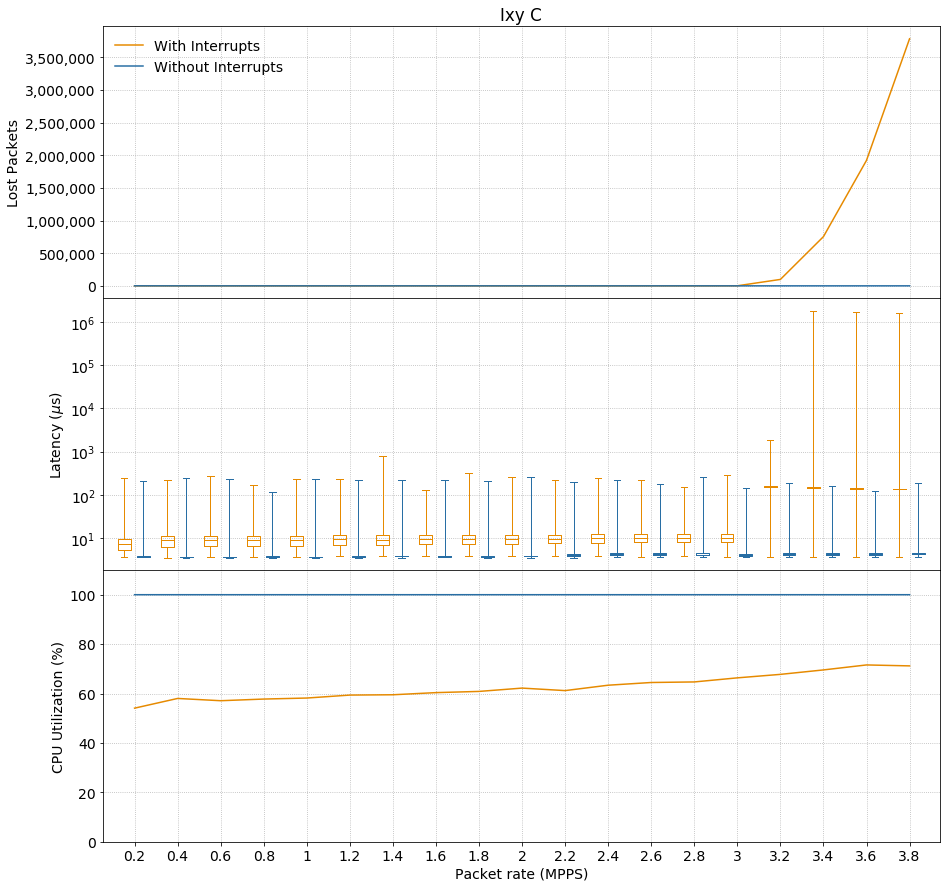

In [22]:
# Combination of CPU Util, INT/s, Latency
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

def plot_combined_multi(data1, data2, title):
    color1 = '#e68a00'
    color2 = '#286ea4'
    
    fig, [ax1, ax3, ax4] = plt.subplots(3, 1, sharex=True, figsize=(15,15))
    fig.subplots_adjust(hspace=0)
    
    # Plot INT/s and Lost Rate
    ln1 = ax1.plot(data1['rates'], data1['lost'], label='INT/s', color=color1)
    ln2 = ax1.plot(data2['rates'], data2['lost'], label='INT/s', color=color2)
    ax1.set(title=title, ylabel='Lost Packets')
    ax1.grid(linestyle='dotted')
    ax1.yaxis.set_major_formatter(tick.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    # Plot boxchart
    stats1 = []
    stats2 = []
    for i in range(len(data1['latencies'])):
        stats1.append(boxplot_stats(data1['latencies'][i], data1['weights'][i], data1['rates'][i]))
    for i in range(len(data2['latencies'])):
        stats2.append(boxplot_stats(data2['latencies'][i], data2['weights'][i], data2['rates'][i]))
    bpl = ax3.bxp(stats1, positions=np.array(range(len(data1['latencies'])))-0.24, widths=0.3)
    bpr = ax3.bxp(stats2, positions=np.array(range(len(data2['latencies'])))+0.2, widths=0.3)
    set_box_color(bpl, color1)
    set_box_color(bpr, color2)
    ax3.set_yscale('log')
    ax3.minorticks_off()

    ax3.set(ylabel='Latency (' + r'$\mu$s)')
    ax3.grid(linestyle='dotted', which='both')
    
    # Plot CPU Util
    ax4.plot(data1['rates'], data1['cpu_utils'], label='CPU Utilization', color=color1)
    ax4.plot(data2['rates'], data2['cpu_utils'], label='CPU Utilization', color=color2)
    ax4.set_ylim([0, 110])

    ax4.set(ylabel='CPU Utilization (%)', xlabel='Packet rate (MPPS)')
    ax4.grid(linestyle='dotted')
    ax1.legend(ln1 + ln2, ['With Interrupts', 'Without Interrupts'], loc='upper left', frameon=False)
    plt.margins(0)
    font = {'size'   : 14}
    matplotlib.rc('font', **font)
    plt.savefig('interrupts_ixyc.eps', format='eps', bbox_inches='tight')
    plt.show()
    
data1 = {}
data2 = {}

interrupt = results['interrupt']
data1['latencies'] = []
data1['weights'] = []
data1['rates'] = []
data1['lost'] = []
data1['cpu_utils'] = []
data1['power'] = []
for rate in results['interrupt']:
    data1['latencies'].append(interrupt[rate]["latency"]["latency"])
    data1['weights'].append(interrupt[rate]["latency"]["weight"])
    data1['rates'].append(rate)
    data1['lost'].append(interrupt[rate]["tx"] - interrupt[rate]["rx"])
    data1['cpu_utils'].append(interrupt[rate]["cpu_util"])

interruptDisabled = results['interruptDisabled']
data2['latencies'] = []
data2['weights'] = []
data2['rates'] = []
data2['lost'] = []
data2['cpu_utils'] = []
data2['power'] = []
for rate in results['interruptDisabled']:
    data2['latencies'].append(interruptDisabled[rate]["latency"]["latency"])
    data2['weights'].append(interruptDisabled[rate]["latency"]["weight"])
    data2['rates'].append(rate)
    data2['lost'].append(interruptDisabled[rate]["tx"] - interruptDisabled[rate]["rx"])
    data2['cpu_utils'].append(interruptDisabled[rate]["cpu_util"])
    
for latency in interruptDisabled[rate]["latency"]:
    if interruptDisabled[rate]["latency"][latency] > 1000:
        

plot_combined_multi(data1, data2, 'Ixy C')
